In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/Netflix_titles.csv")
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**cleaning data**

In [3]:
check=data.isnull().sum()
print('terdapat data missing pada variabel :', [i for i in check.index if check.loc[i]!=0],'kemudian dapat dilakukan imputation menggunakan API berdasarlan masing movie')

terdapat data missing pada variabel : ['director', 'cast', 'country', 'date_added', 'rating', 'duration'] kemudian dapat dilakukan imputation menggunakan API berdasarlan masing movie


In [4]:
check

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**EDA**

In [5]:
count_type=data['type'].value_counts()
count_type.plot(kind='bar',color=['r','b'])

    pada dataset ini sebagian besar diisi oleh jenis film daripada tv show

Text(0, 0.5, 'count')

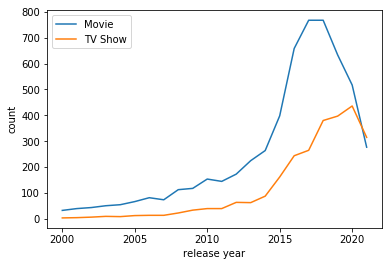

In [6]:
#release date 2000 to 2021
import numpy as np
from matplotlib import  pyplot as plt
table_piv=data.pivot_table(index='release_year',columns='type',values='show_id',aggfunc='count')
year_2000=table_piv.loc['2000':,:]
plt.plot(year_2000.index,year_2000['Movie'])
plt.plot(year_2000.index,year_2000['TV Show'])
plt.legend()
plt.xlabel('release year')
plt.ylabel('count')

    Jumlah produksi film pada tahun 2000 sampia 2021 selalu lebih besar dari TV Show. Produksi movie mengamalami peningkatan setiap tahunnya dan mengalami puncak pada tahun 2016/2017. Hal itu juga terjadi pada produksi TV Show yang mengalami peningkaatan juga dan mengalamin puncaknya pada tahun 2019
    

Text(0, 0.5, 'count')

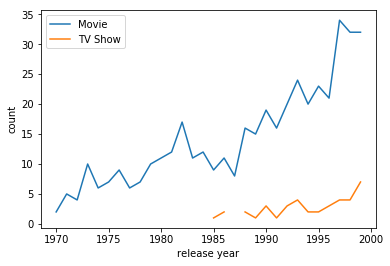

In [7]:
#release date 1970 to 1999
import numpy as np
from matplotlib import  pyplot as plt
table_piv=data.pivot_table(index='release_year',columns='type',values='show_id',aggfunc='count')
year_2000=table_piv.loc['1970':'1999',:]
plt.plot(year_2000.index,year_2000['Movie'])
plt.plot(year_2000.index,year_2000['TV Show'])
plt.legend()
plt.xlabel('release year')
plt.ylabel('count')

    Produksi movie sudah ada pada tahun 1970 sedangkan TV shows baru diproduksi pada tahun 1985 itupun cuma sebentar istirahat kemudian dilanjut pada tahun 1989. Produksi movie dari tahun 1970 sampai 1999 mengalami fluktuasi,

Persebaran durasi movie berdasarkan release year. Karena variabel durasi terdapat missing value maka harus diisi terlebih dahulu

- Movie

In [8]:
data_movie=data[data['type']=='Movie']
dur=data_movie['duration'].reset_index()
print(dur.loc[dur['duration'].isna()])

      index duration
3562   5541      NaN
3738   5794      NaN
3747   5813      NaN


In [9]:
check_title=dur.loc[dur['duration'].isna()]['index']
title_mismovie=[data.loc[i,'title'] for i in check_title]
print(title_mismovie)


['Louis C.K. 2017', 'Louis C.K.: Hilarious', 'Louis C.K.: Live at the Comedy Store']


    terdapat 3 missing value pada tipe movie, dengan judul 'Louis C.K. 2017', 'Louis C.K.: Hilarious', 'Louis C.K.: Live at the Comedy Store'

In [10]:
from imdb import IMDb
data_copy1=data.copy()
for i in check_title:
    mov=IMDb()
    title=data_copy1.loc[i,'title']
    name=mov.search_movie(title)
    movie=name[0]
    kump_movie=mov.get_movie(movie.movieID)
    runtime=kump_movie.get('runtime')
    data_copy1.loc[i,'duration']=runtime

In [11]:
datamov=data_copy1[data_copy1['type']=='Movie']

In [12]:
#data formatting
index_season=datamov[datamov['duration'].str.contains('seasons?|season',case=False)].index
index_season

Int64Index([], dtype='int64')

In [13]:
data_min=datamov.drop(index_season)

In [14]:
data_min['duration']=data_min['duration'].str.replace(" min","",regex=False)
data_min['duration']=data_min['duration'].astype('int')

In [15]:
movie_data=data_min[data_copy1['type']=='Movie']
print(movie_data.loc[movie_data.index.isna(),'duration'])

Series([], Name: duration, dtype: int32)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


    sudah tidak ada missing value artinya kita dapat melakukan EDA terhadap variabel duration untuk type movie

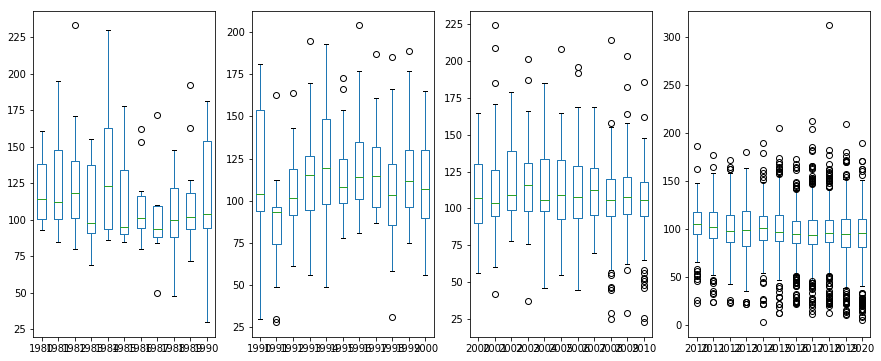

In [16]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,6))
awal=1980
akhir=1991
for i in range(4):
    li=[i for i in range(awal,akhir,1)]
    kump={}
    for j in li:
        ambil=movie_data[movie_data['release_year']==j]['duration']
        kump[j]=ambil
    data_dr=pd.DataFrame(kump).reset_index()
    data_dr.drop(['index'],axis=1,inplace=True)
    data_dr.plot(kind='box',ax=ax[i])
    awal+=10
    akhir+=10

    dari tahun 1980 sampai tahun 2000 durasi movie bervariasi, kemudian mulai tahun 2000 sampai 2020 median datanya sekitar durasi 100 menit

- Tv show

In [17]:
datatv_movie=data[data['type']=='TV Show']
durtv=datatv_movie['duration'].reset_index()
print(durtv.loc[durtv['duration'].isna()])

Empty DataFrame
Columns: [index, duration]
Index: []


    tidak ada missing value pada duration untuk tv show

In [18]:
datatv_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [19]:
#data formatting
min_season=datatv_movie[datatv_movie['duration'].str.contains('seasons?|season',case=False)].index
datatv_min=datatv_movie.loc[min_season]
datatv_min['duration']=datatv_min['duration'].str.replace("seasons?","",case=False,regex=True).str.strip()
datatv_min['duration']=datatv_min['duration'].astype('int')

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


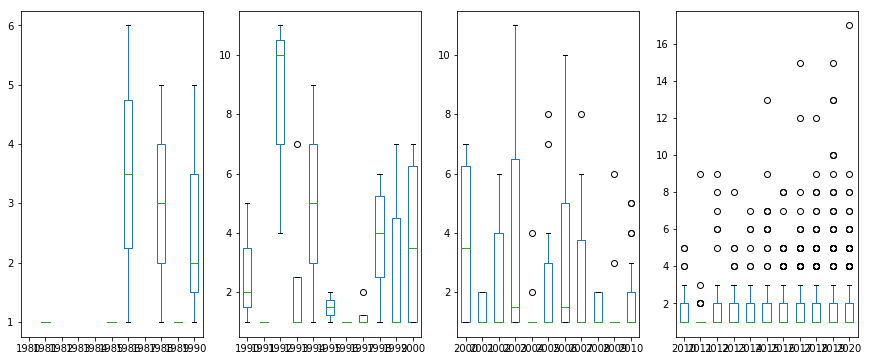

In [20]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(15,6))
awal=1980
akhir=1991
for i in range(4):
    li=[i for i in range(awal,akhir,1)]
    kump={}
    for j in li:
        ambil=datatv_min[datatv_min['release_year']==j]['duration']
        kump[j]=ambil
    data_dr=pd.DataFrame(kump).reset_index()
    data_dr.drop(['index'],axis=1,inplace=True)
    data_dr.plot(kind='box',ax=ax[i])
    awal+=10
    akhir+=10

    Pada tahun 1990 sampai 2000 season pada tv show bervariasi ada yang mencapai 10 season, sedangkan pada tahun 2010 sampai 2020 tv show konsisten di 1 sampai 2 season

**- Negara dengan penayangan film paling banyak (TOP 5)**

    Karena variabel country memiliki nilai missing value maka kita harus isi dulu,

In [21]:
data_copy2=data_copy1.copy()
#index diamana country berninai Nan
check_misscoun=data_copy2.loc[data_copy2['country'].isna()]
check_misscoun.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


In [24]:
#ambil title movie yang country bernilai Nan
title_nan=check_misscoun['title']
index_title=title_nan.index.tolist()
len(index_title)


831

    terdapat 831 missing value pada country, karena pengisian missing value terlalu lama maka kita lewatkan

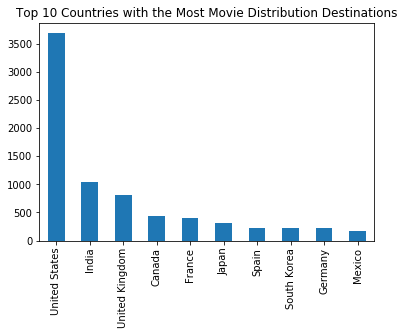

In [26]:
dataex=data_copy1['country'].str.split(",").apply(pd.Series).stack().str.strip().reset_index(drop=True)
counttab=dataex.value_counts()
counttab[:10].plot(kind='bar',title='Top 10 Countries with the Most Movie Distribution Destinations')

    Negara USA menjadi negara tertinggi dengan 3500 kali penayangan unggul jauh dibandingkan dengan India dan UK di 3 besar. Jelas karena Amerika memiliki market yang besar, konsumen yang besar dan beragam, terdapat hollywood, adanya penghargaan yang bergengsi, potensi menghasilkan pendapatan yang besar, dan insfrastruktur distribusi yang kuat.